# Plant Disease Detection Using CNN Architecture 

### Importing libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
import pandas as pd
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score

### Loding the dataset from drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive"

 16241007861786notification.gsheet  'Colab Notebooks'
 archive.zip			    'Mini project .pptx'
'Biology Presentation.mp4'	    'Nagasai Declaration form.pdf'
 Classroom			    'Shinchan Legend Called Dance amigo.mp4'


In [4]:
!unzip -q "/content/gdrive/My Drive/archive.zip"

### Image Acquisition 

In [5]:
TRAIN_DIR = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
VAL_DIR = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
TEST_DIR = "/content/test/test"
IMG_SHAPE  = (256, 256)
BATCH_SIZE = 64

In [6]:
import os

In [7]:
total_train = 0

for d in os.listdir(TRAIN_DIR):
    path = os.path.join(TRAIN_DIR, d)
    img_count = len(os.listdir(path))
    total_train += img_count
    print(f'{d:50} : {img_count}')

print(f'\nTotal training images: {total_train}')

Pepper,_bell___Bacterial_spot                      : 1913
Potato___Late_blight                               : 1939
Tomato___Tomato_Yellow_Leaf_Curl_Virus             : 1961
Tomato___healthy                                   : 1926
Grape___healthy                                    : 1692
Pepper,_bell___healthy                             : 1988
Apple___Apple_scab                                 : 2016
Apple___Cedar_apple_rust                           : 1760
Strawberry___healthy                               : 1824
Tomato___Early_blight                              : 1920
Cherry_(including_sour)___healthy                  : 1826
Tomato___Late_blight                               : 1851
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 1642
Grape___Esca_(Black_Measles)                       : 1920
Corn_(maize)___Northern_Leaf_Blight                : 1908
Peach___Bacterial_spot                             : 1838
Potato___Early_blight                              : 1939
Tomato___Bacte

In [8]:
total_val = 0

for d in os.listdir(VAL_DIR):
    path = os.path.join(VAL_DIR, d)
    img_count = len(os.listdir(path))
    total_val += img_count
    print(f'{d:50} : {img_count}')

print(f'\nTotal validation images: {total_val}')

Pepper,_bell___Bacterial_spot                      : 478
Potato___Late_blight                               : 485
Tomato___Tomato_Yellow_Leaf_Curl_Virus             : 490
Tomato___healthy                                   : 481
Grape___healthy                                    : 423
Pepper,_bell___healthy                             : 497
Apple___Apple_scab                                 : 504
Apple___Cedar_apple_rust                           : 440
Strawberry___healthy                               : 456
Tomato___Early_blight                              : 480
Cherry_(including_sour)___healthy                  : 456
Tomato___Late_blight                               : 463
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 410
Grape___Esca_(Black_Measles)                       : 480
Corn_(maize)___Northern_Leaf_Blight                : 477
Peach___Bacterial_spot                             : 459
Potato___Early_blight                              : 485
Tomato___Bacterial_spot        

In [9]:
test_image_data = []
test_image_filenames = []

for img_name in os.listdir(TEST_DIR):
    img = load_img(os.path.join(TEST_DIR, img_name), target_size = IMG_SHAPE)
    test_image_data.append(img_to_array(img, dtype = 'uint8'))
    test_image_filenames.append(img_name)
    print(img_name)
    
test_image_data = np.array(test_image_data)/255
print(f'\nTotal testing images: {len(test_image_data)}')

PotatoEarlyBlight3.JPG
TomatoYellowCurlVirus4.JPG
AppleScab1.JPG
TomatoYellowCurlVirus2.JPG
TomatoYellowCurlVirus1.JPG
AppleCedarRust2.JPG
TomatoYellowCurlVirus5.JPG
TomatoYellowCurlVirus6.JPG
TomatoEarlyBlight4.JPG
TomatoEarlyBlight2.JPG
AppleScab3.JPG
CornCommonRust1.JPG
TomatoHealthy2.JPG
CornCommonRust3.JPG
TomatoEarlyBlight3.JPG
AppleCedarRust4.JPG
TomatoEarlyBlight6.JPG
AppleCedarRust1.JPG
PotatoHealthy1.JPG
PotatoEarlyBlight5.JPG
PotatoEarlyBlight1.JPG
PotatoEarlyBlight2.JPG
TomatoEarlyBlight5.JPG
AppleScab2.JPG
TomatoHealthy1.JPG
PotatoHealthy2.JPG
TomatoHealthy3.JPG
PotatoEarlyBlight4.JPG
TomatoYellowCurlVirus3.JPG
AppleCedarRust3.JPG
TomatoEarlyBlight1.JPG
TomatoHealthy4.JPG
CornCommonRust2.JPG

Total testing images: 33


In [10]:
total_classes = len(os.listdir(TRAIN_DIR))

print(f'\nTotal number of classes: {total_classes}')


Total number of classes: 38


### Image Augmentation 

In [11]:
train_image_gen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 15,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        zoom_range = 0.05,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode = 'reflect'
    )

train_data_gen = train_image_gen.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = TRAIN_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 70295 images belonging to 38 classes.


### Sample Images

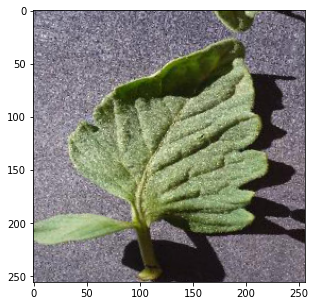

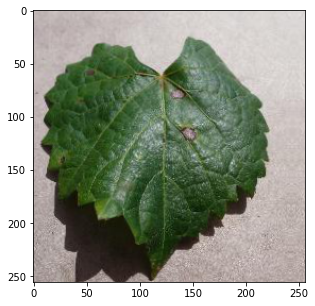

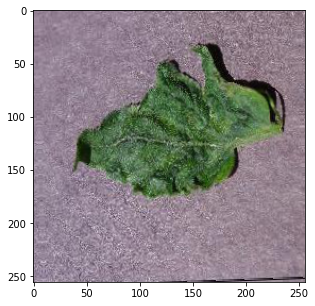

In [12]:
timg,label=train_data_gen.next()
timg.shape
def plot(img_arr,label):
  for i,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(i)
    plt.show()
plot(timg[:3],label[:3])

In [13]:
val_image_gen = ImageDataGenerator(rescale = 1./255)

val_data_gen = val_image_gen.flow_from_directory(
        batch_size = BATCH_SIZE,
        directory = VAL_DIR,
        shuffle = True,
        target_size = IMG_SHAPE
    )

Found 17572 images belonging to 38 classes.


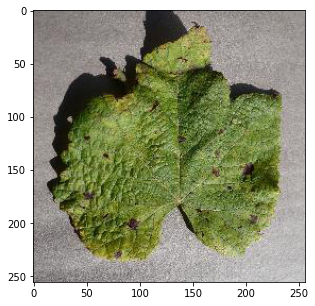

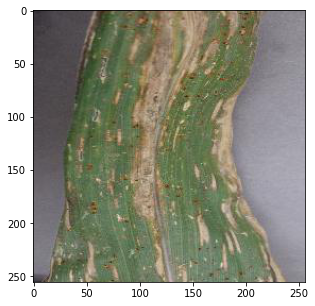

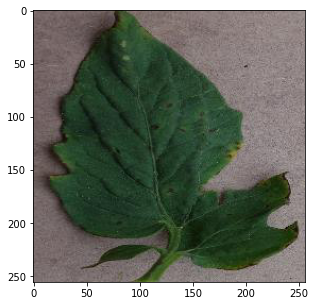

In [14]:
timg,label=val_data_gen.next()
timg.shape
def plot(img_arr,label):
  for i,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(i)
    plt.show()
plot(timg[:3],label[:3])

### Image pre-processing 

In [15]:
train_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [16]:
class_name_lookup = {name: index for index, name in train_data_gen.class_indices.items()}

for k, v in class_name_lookup.items():
    print(f"{k:2} : {v}")

 0 : Apple___Apple_scab
 1 : Apple___Black_rot
 2 : Apple___Cedar_apple_rust
 3 : Apple___healthy
 4 : Blueberry___healthy
 5 : Cherry_(including_sour)___Powdery_mildew
 6 : Cherry_(including_sour)___healthy
 7 : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
 8 : Corn_(maize)___Common_rust_
 9 : Corn_(maize)___Northern_Leaf_Blight
10 : Corn_(maize)___healthy
11 : Grape___Black_rot
12 : Grape___Esca_(Black_Measles)
13 : Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14 : Grape___healthy
15 : Orange___Haunglongbing_(Citrus_greening)
16 : Peach___Bacterial_spot
17 : Peach___healthy
18 : Pepper,_bell___Bacterial_spot
19 : Pepper,_bell___healthy
20 : Potato___Early_blight
21 : Potato___Late_blight
22 : Potato___healthy
23 : Raspberry___healthy
24 : Soybean___healthy
25 : Squash___Powdery_mildew
26 : Strawberry___Leaf_scorch
27 : Strawberry___healthy
28 : Tomato___Bacterial_spot
29 : Tomato___Early_blight
30 : Tomato___Late_blight
31 : Tomato___Leaf_Mold
32 : Tomato___Septoria_leaf_spot
33 

### Modeling

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

In [18]:
ep = 7
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/7
2197/2197 [==============================] - 783s 350ms/step - loss: 1.5587 - accuracy: 0.5469 - val_loss: 0.5806 - val_accuracy: 0.8077
Epoch 2/7
2197/2197 [==============================] - 767s 349ms/step - loss: 0.4308 - accuracy: 0.8620 - val_loss: 0.2557 - val_accuracy: 0.9130
Epoch 3/7
2197/2197 [==============================] - 765s 348ms/step - loss: 0.2576 - accuracy: 0.9161 - val_loss: 0.2199 - val_accuracy: 0.9274
Epoch 4/7
2197/2197 [==============================] - 769s 350ms/step - loss: 0.1793 - accuracy: 0.9405 - val_loss: 0.1585 - val_accuracy: 0.9481
Epoch 5/7
2197/2197 [==============================] - 766s 349ms/step - loss: 0.1364 - accuracy: 0.9549 - val_loss: 0.1636 - val_accuracy: 0.9462
Epoch 6/7
2197/2197 [==============================] - 767s 349ms/step - loss: 0.1042 - accuracy: 0.9648 - val_loss: 0.1720 - val_accuracy: 0.9451
Epoch 7/7
2197/2197 [==============================] - 766s 349ms/step - loss: 0.0851 - accuracy: 0.9717 - val_loss: 0

### Plotting

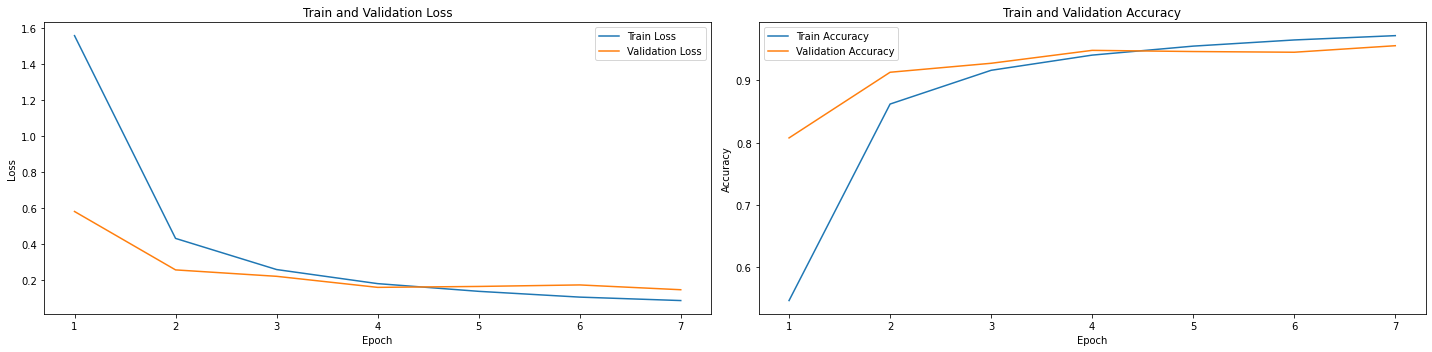

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,8),history.history['loss'],label="Train Loss")
plt.plot(range(1,8),history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,8),history.history['accuracy'], label="Train Accuracy")
plt.plot(range(1,8),history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [20]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [21]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [22]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.17 %
Test Accuracy   : 95.56 %
Precision Score : 95.56 %
Recall Score    : 95.56 %


### Testing

In [23]:
test_pred = np.argmax(model.predict(test_image_data), axis = 1)
test_pred

array([20, 35,  0, 35, 35,  2, 35, 35, 29, 30,  7,  8,  3,  8, 29,  2, 29,
        2, 19, 20, 20, 20, 29,  0, 37, 22, 37, 20, 35,  2, 29, 37,  8])

In [24]:
import pandas as pd

In [25]:
test_pred_classes = [class_name_lookup[i] for i in test_pred]

pd.DataFrame({
    "Filename": test_image_filenames,
    "Predicted classes": test_pred_classes
    })

,Filename,Predicted classes
0,PotatoEarlyBlight3.JPG,Potato___Early_blight
1,TomatoYellowCurlVirus4.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
2,AppleScab1.JPG,Apple___Apple_scab
3,TomatoYellowCurlVirus2.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
4,TomatoYellowCurlVirus1.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
5,AppleCedarRust2.JPG,Apple___Cedar_apple_rust
6,TomatoYellowCurlVirus5.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
7,TomatoYellowCurlVirus6.JPG,Tomato___Tomato_Yellow_Leaf_Curl_Virus
8,TomatoEarlyBlight4.JPG,Tomato___Early_blight
9,TomatoEarlyBlight2.JPG,Tomato___Late_blight


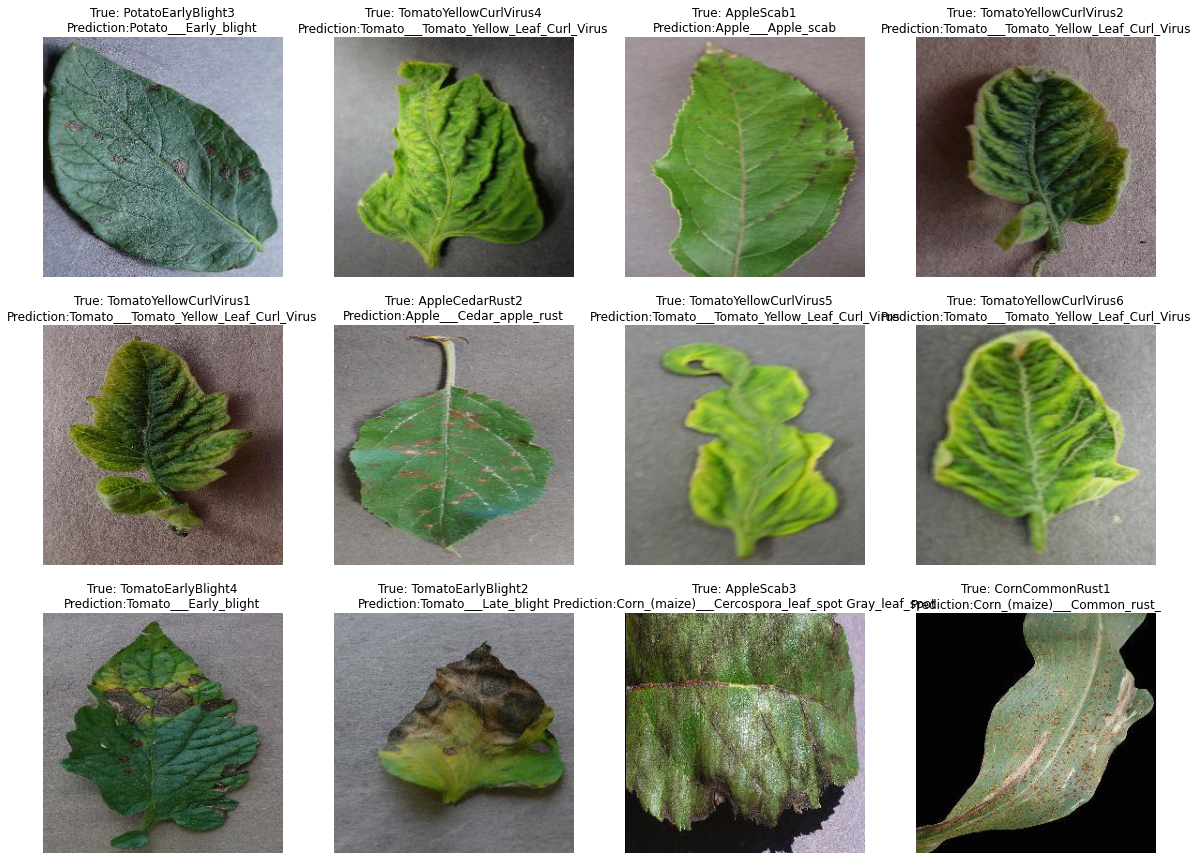

In [26]:
plt.subplots(nrows = 3, ncols = 4, figsize = (20, 15))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.imshow(test_image_data[i])
    plt.title(f"True: {test_image_filenames[i][:-4]}\nPrediction:{test_pred_classes[i]}")

plt.show()